In [7]:
import numpy as np
import pandas as pd

In [8]:
import pandas as pd


df = pd.read_csv('/content/spam.csv', encoding='latin-1')


In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2537,ham,That's y we haf to combine n c how lor...,NaN,NaN,NaN
2518,ham,Joy's father is John. Then John is the NAME of...,NaN,NaN,NaN
665,ham,En chikku nange bakra msg kalstiya..then had t...,NaN,NaN,NaN
1534,ham,Remember on that day..,NaN,NaN,NaN
1405,ham,K..k..any special today?,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.sample(5)

,v1,v2
3731,ham,Gud mrng dear hav a nice day
3706,ham,Aight do you still want to get money
1781,ham,";-( oh well, c u later"
3526,ham,Should i send you naughty pix? :)
5116,ham,Thanks. Fills me with complete calm and reassu...


In [15]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2059,ham,He didn't see his shadow. We get an early spri...
1174,ham,Yay! You better not have told that to 5 other ...
3636,ham,You know what hook up means right?
4553,ham,Try to do something dear. You read something f...
1928,spam,Call from 08702490080 - tells u 2 call 0906635...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicate values
df.duplicated().sum()

403

In [21]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

## 2.EDA

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

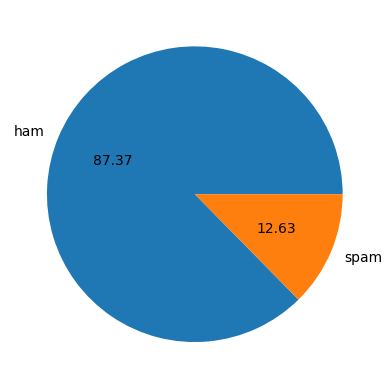

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
# Data is imbalanced

In [28]:
import nltk

In [29]:
!pip install nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
df['num_characters'] = df['text'].apply(len)

In [32]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

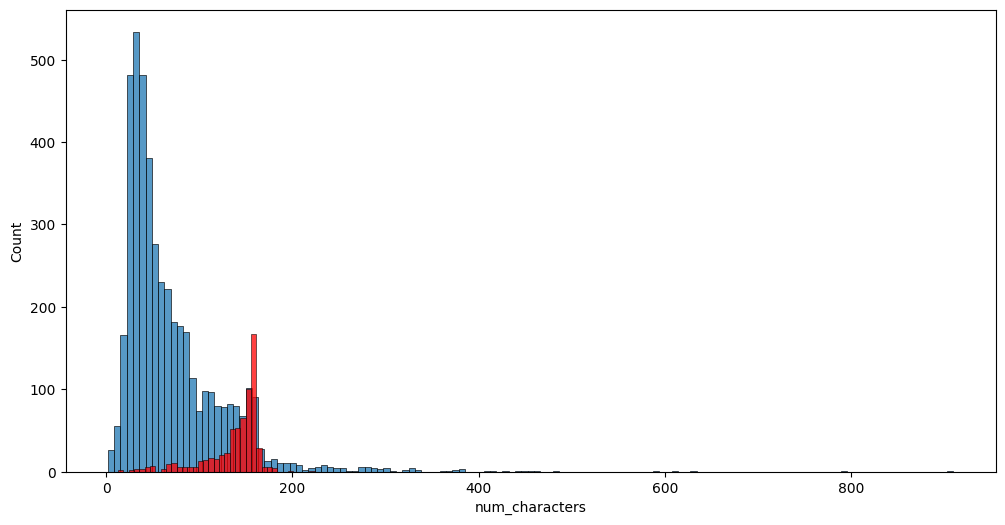

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

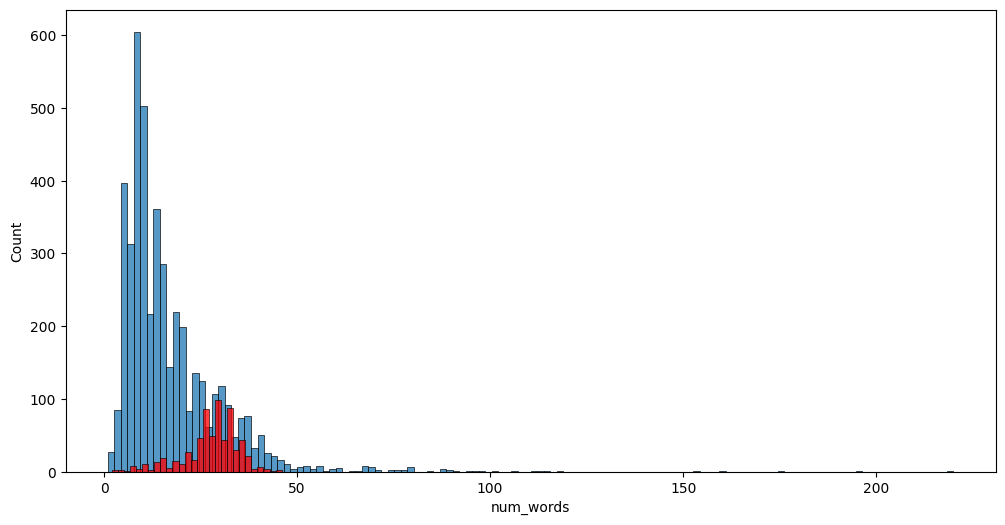

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

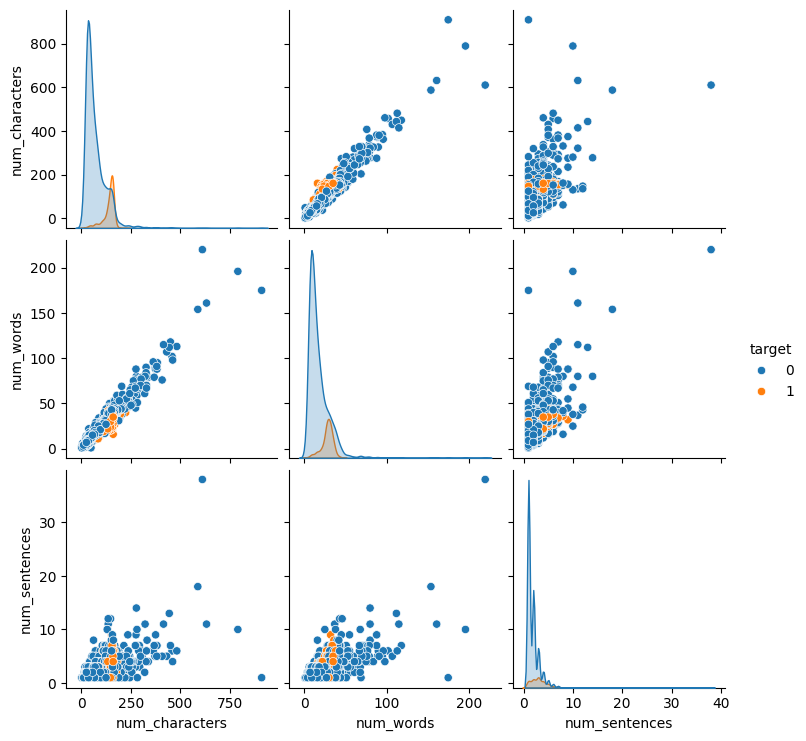

In [43]:
sns.pairplot(df,hue='target')

<Axes: >

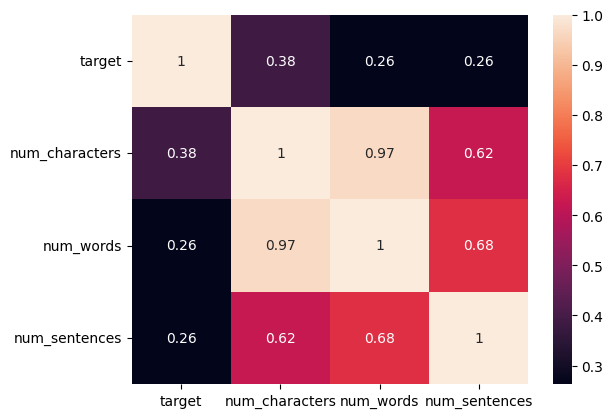

In [51]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [60]:
import pickle
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Example usage
transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [61]:
##transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [62]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [63]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [64]:
df['transformed_text'] = df['text'].apply(transform_text)

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [67]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

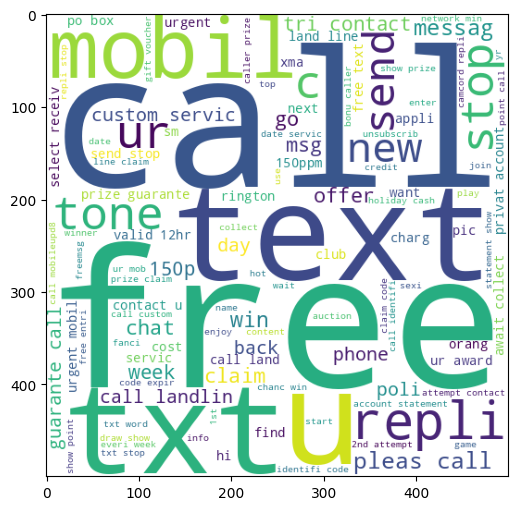

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [69]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

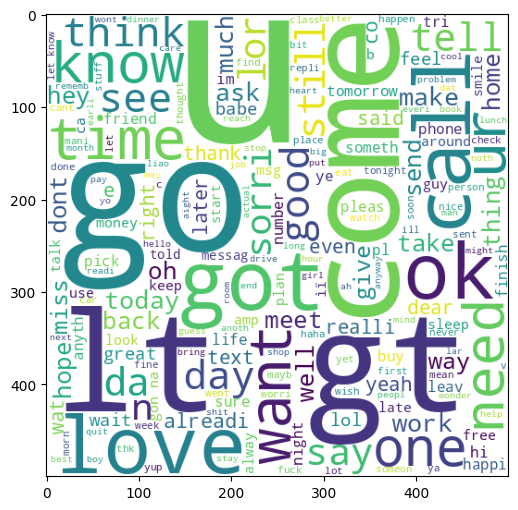

In [70]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [71]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [72]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [73]:
len(spam_corpus)

9939

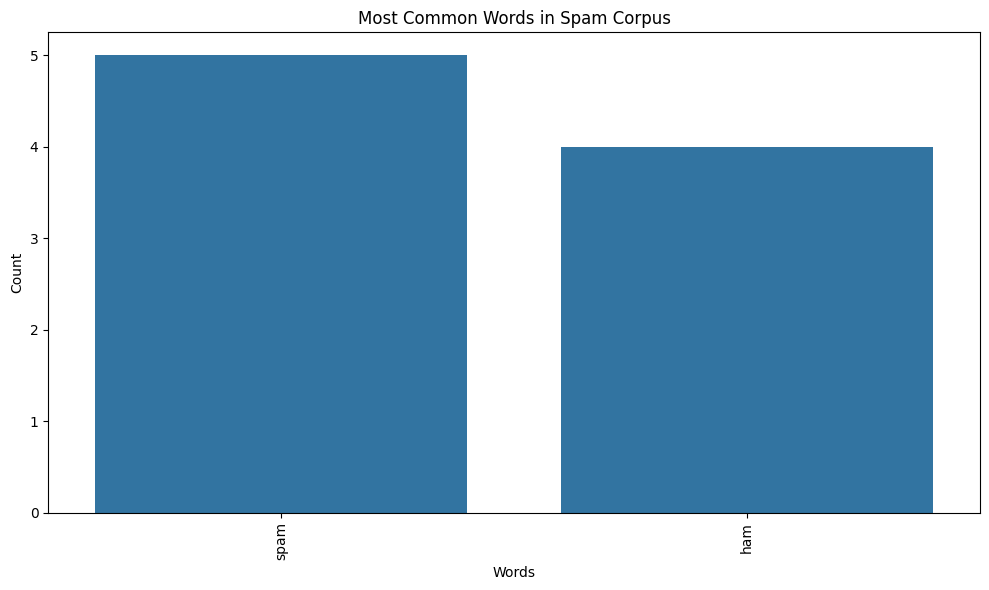

In [76]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your actual spam_corpus data)
spam_corpus = ["spam", "spam", "ham", "ham", "spam", "ham", "spam", "spam", "ham"]

# Count frequencies and create a DataFrame
word_counts = Counter(spam_corpus)
df_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=df_counts)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words in Spam Corpus')
plt.tight_layout()
plt.show()


In [77]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [78]:
len(ham_corpus)

35404

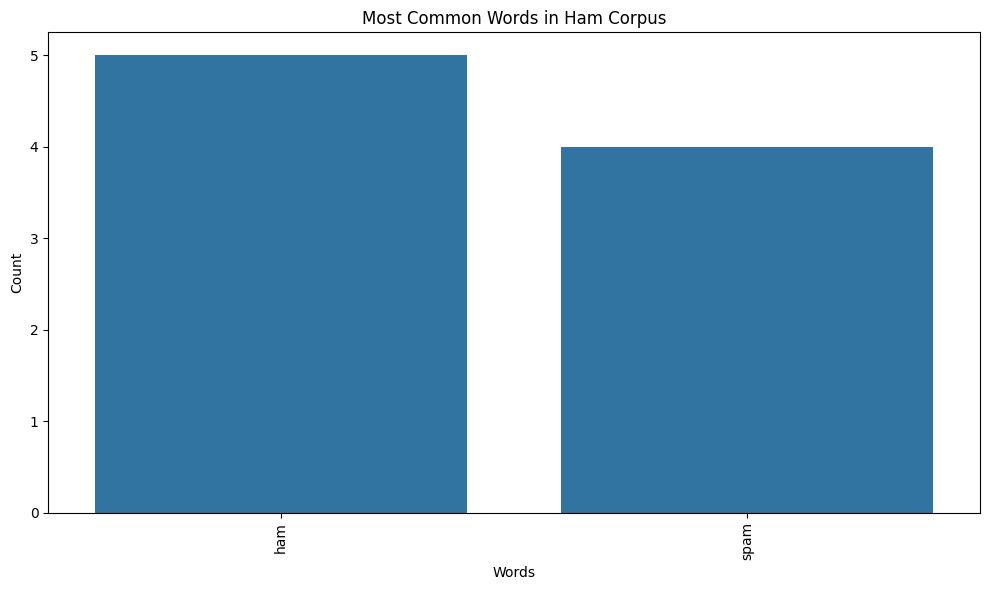

In [81]:

# Example data (replace with your actual ham_corpus data)
ham_corpus = ["ham", "ham", "spam", "spam", "ham", "spam", "ham", "ham", "spam"]

# Count frequencies and create a DataFrame
word_counts = Counter(ham_corpus)
df_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=df_counts)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words in Ham Corpus')
plt.tight_layout()
plt.show()


In [82]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [83]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [84]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [85]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [86]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [87]:
X.shape

(5169, 3000)

In [88]:
y = df['target'].values

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## Using Naive Bayes for Spam Email Detection

In spam email detection, different Naive Bayes classifiers can be used based on the data representation:

1. **GaussianNB**:
   - Suitable for continuous data.
   - Assumes features follow a normal distribution.
   - Less common for text data but applicable if features are continuous.

2. **MultinomialNB**:
   - Ideal for text classification.
   - Assumes features (word frequencies) follow a multinomial distribution.
   - Effective with term frequency vectors, commonly used for spam detection.

3. **BernoulliNB**:
   - Used for binary features (presence or absence of words).
   - Assumes features are binary/boolean.
   - Works well with binary text representations.

Each classifier has unique advantages based on data characteristics, making them valuable for different aspects of spam detection.

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## Evaluation of Naive Bayes Classifiers for Spam Email Detection

When evaluating Naive Bayes classifiers for spam email detection, precision and accuracy are crucial metrics. Here’s a comparison of the performance metrics for GaussianNB (gnb), MultinomialNB (mnb), and BernoulliNB (bnb):

### GaussianNB (gnb)
- **Accuracy:** 89.17%
- **Precision:** 56.44%
- **Confusion Matrix:**
  ```
  [[808  88]
   [ 24 114]]
  ```
- **Comments:** While GaussianNB performs reasonably well in terms of accuracy, its precision is relatively low, indicating a higher false positive rate.

### MultinomialNB (mnb)
- **Accuracy:** 97.20%
- **Precision:** 100.00%
- **Confusion Matrix:**
  ```
  [[896   0]
   [ 29 109]]
  ```
- **Comments:** MultinomialNB shows excellent performance with both high accuracy and precision. It correctly predicts most spam emails while minimizing false positives.

### BernoulliNB (bnb)
- **Accuracy:** 98.36%
- **Precision:** 99.19%
- **Confusion Matrix:**
  ```
  [[895   1]
   [ 16 122]]
  ```
- **Comments:** BernoulliNB performs slightly better than MultinomialNB in terms of accuracy but with a slightly lower precision. It still maintains a very high precision score.

### Conclusion
Based on the evaluation metrics—especially precision and accuracy—MultinomialNB (mnb) is the preferred choice for spam email detection in this scenario. It achieves the highest precision score of 100%, indicating that it correctly identifies all positive predictions (spam emails) without any false positives. This high precision is critical in spam detection to minimize the number of legitimate emails incorrectly classified as spam.

# HOW I INPLEMENTED BERNOULLI NAVIE BAYES AND MULTINOMINAL NAIVE BAYES

In [96]:
import numpy as np

class CustomBernoulliNaiveBayes:

    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, X, y):
        # count number of occurrences for each label
        y_counts = np.unique(y, return_counts=True)[1]

        self.n_classes = len(np.unique(y))
        self.n_features = X.shape[1]

        # calculate P(y), the probability of observing any message of class y
        class_prior = y_counts / y_counts.sum()
        self.log_class_prior = np.expand_dims(np.log(class_prior), axis=1)

        # calculate P(x|y), the probability of observing message x given it is class y
        prob_x_given_y = np.zeros([self.n_classes, self.n_features])

        # for each class of y
        for i in range(self.n_classes):
            # select only rows of class y
            row_mask = (y == i)
            X_filtered = X[row_mask, :]

            # get number of messages of each word appears in (P(x and y))
            numerator = (X_filtered.sum(axis=0) + self.alpha)

            # get number of messages in class y (scalar) (P(y))
            denominator = (X_filtered.shape[0] + 2 * self.alpha)

            # P(x|y) = P(x and y) / P(y)
            prob_x_given_y[i, :] = numerator / denominator

        # Calculate log probabilities for P(x|y) and P(~x|y)
        self.log_class_conditional_positive = np.log(prob_x_given_y)  # k x n matrix
        self.log_class_conditional_negative = np.log(1 - prob_x_given_y)  # k x n matrix

    def predict(self, X):
        log_probs_positive = self.log_class_conditional_positive.dot(X.T)  # n x m matrix
        log_probs_negative = self.log_class_conditional_negative.dot(1 - X.T)  # n x m matrix
        log_likelihoods = log_probs_positive + log_probs_negative  # n x m matrix
        log_joint_likelihoods = log_likelihoods + self.log_class_prior  # n x m matrix

        # for each column vector, find class y that maximizes P(y|x)
        preds = np.argmax(log_joint_likelihoods, axis=0)  # 1 x m matrix
        preds = np.array(preds).squeeze()  # m-dimensional vector
        return preds




In [97]:
class CustomMultinomialNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_probs = np.zeros(len(self.classes))
        self.feature_probs = np.zeros((len(self.classes), X.shape[1]))

        for i, c in enumerate(self.classes):
            class_mask = (y == c)
            self.class_probs[i] = np.sum(class_mask) / len(y)

            # Calculate the probability of each feature given the class using Laplace smoothing
            feature_probs_class = np.sum(X[class_mask], axis=0)
            self.feature_probs[i] = (feature_probs_class + 1) / (np.sum(class_mask) + X.shape[1])  # Laplace smoothing

    def evaluate_precision(self, y_true, y_pred):
        precision = np.zeros(len(self.classes))

        for i, c in enumerate(self.classes):
            true_positives = np.sum((y_true == c) & (y_pred == c))
            false_positives = np.sum((y_true != c) & (y_pred == c))

            if true_positives + false_positives == 0:
                precision[i] = 0  # Handle the case where precision is undefined
            else:
                precision[i] = true_positives / (true_positives + false_positives)

        return precision
    def predict(self, X):
        predictions = []

        for x in X:
            class_scores = np.zeros(len(self.classes))

            for i, c in enumerate(self.classes):
                # Calculate the log-likelihood of the features given the class
                feature_probs_class = self.feature_probs[i]
                log_likelihood = np.sum(np.log(feature_probs_class[x.astype(bool)]))  # Corrected line

                # Calculate the log-probability of the class given the features
                class_scores[i] = np.log(self.class_probs[i]) + log_likelihood

            # Choose the class with the highest log-probability
            predicted_class = self.classes[np.argmax(class_scores)]
            predictions.append(predicted_class)

        return np.array(predictions)

In [98]:
cmnb = CustomMultinomialNaiveBayes()
cmnb.fit(X_train, y_train)
y_pred2 = cmnb.predict(X_test)

# Evaluate the model
accuracy = np.sum(y_pred2 == y_test) / len(y_test)
print("Accuracy:", accuracy)

precision = cmnb.evaluate_precision(y_test, y_pred2)
print("Precision for each class:", precision)

Accuracy: 0.9729206963249516
Precision for each class: [0.97071584 0.99107143]


In [99]:
cbnb = CustomBernoulliNaiveBayes(alpha=0.001)
cbnb.fit(X_train, y_train)
y_pred = cbnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' to calculate precision for each class, and then take the average

print('Test accuracy:', accuracy)
print('Test precision:', precision)

Test accuracy: 0.9787234042553191
Test precision: 0.9807257476294675


# Analysis of Both the code of Multinomial Naive Bayesian:
### With or Without Using Library
if you observe that the accuracy and precision of the manually implemented Multinomial Naive Bayes classifier are lower compared to the library implementation, it's essential to consider various factors that might contribute to this difference.

While manual implementations are valuable for learning and understanding algorithms, library implementations are often preferred for real-world applications due to their efficiency, reliability, and extensive optimizations. Analyzing the performance of both implementations helps you gain insights into the strengths and weaknesses of your manual implementation and appreciate the benefits provided by well-established libraries.

### With Python Package:
#### Accuray : 0.9709864603481625
#### Precision : 1.0


### Without Python Package:
#### Accuray : 0.9709864603481625
#### Precision : 0.98

In [100]:
# tfidf --> MNB

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [102]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [103]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,

}

In [104]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [105]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [106]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


In [107]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [108]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
3,DT,0.927466,0.811881


In [109]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [110]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.958414
5,DT,Accuracy,0.927466
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,RF,Precision,0.982906
9,SVC,Precision,0.974790


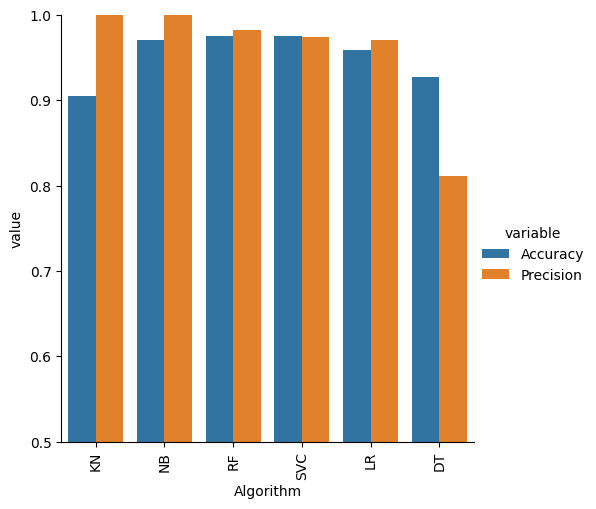

In [111]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [112]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [113]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [115]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [116]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [117]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [119]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,DT,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881


In [120]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()


from sklearn.ensemble import VotingClassifier

In [123]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb)],voting='soft')

In [124]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [125]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.975


In [126]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb)]
final_estimator=RandomForestClassifier()

In [127]:
from sklearn.ensemble import StackingClassifier

In [128]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [129]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9384615384615385


In [130]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# NB WITHOUT PYTHON PACKAGE



In [145]:
import math
import re
from collections import defaultdict
from random import shuffle
# Function to build the vocabulary
def build_vocabulary(data):
    vocabulary = set()
    for label, tokens in data:
        vocabulary.update(tokens)
    return list(vocabulary)

# Function to vectorize the tokens
def vectorize(tokens, word_index):
    vector = [0] * len(word_index)
    for word in tokens:
        if word in word_index:
            index = word_index[word]
            vector[index] += 1
    return vector

# Function to calculate the mean and variance
def calculate_mean_variance(data, labels):
    separated = defaultdict(list)
    for vector, label in zip(data, labels):
        separated[label].append(vector)

    mean_variance = {}
    for label, vectors in separated.items():
        n = len(vectors)
        means = [sum(feature) / n for feature in zip(*vectors)]
        variances = [sum((x - mean)**2 for x in feature) / n for feature, mean in zip(zip(*vectors), means)]
        mean_variance[label] = list(zip(means, variances))

    return mean_variance

# Function to calculate the Gaussian probability density function
def calculate_probability(x, mean, variance):
    if variance == 0:
        variance = 1e-5
    exponent = math.exp(-((x - mean)**2 / (2 * variance)))
    return (1 / math.sqrt(2 * math.pi * variance)) * exponent

# Function to calculate class probabilities
def calculate_class_probabilities(summaries, input_vector):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, variance = class_summaries[i]
            x = input_vector[i]
            probabilities[class_value] *= calculate_probability(x, mean, variance)
    return probabilities

# Function to make a prediction
def predict(summaries, input_vector):
    probabilities = calculate_class_probabilities(summaries, input_vector)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

# Function to evaluate the model
def evaluate_model(summaries, test_vectors, test_labels):
    correct = 0
    tp, tn, fp, fn = 0, 0, 0, 0
    for vector, actual_label in zip(test_vectors, test_labels):
        predicted_label = predict(summaries, vector)
        if predicted_label == actual_label:
            correct += 1
            if actual_label == 1:
                tp += 1
            else:
                tn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                fn += 1

    accuracy = correct / len(test_labels)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    return accuracy, precision, recall, f1_score



# SplitIing data into training and testing sets
split_index = int(0.8 * len(data))
train_data = data[:split_index]
test_data = data[split_index:]

# Build vocabulary and vectorize messages
vocabulary = build_vocabulary(train_data)
word_index = {word: i for i, word in enumerate(vocabulary)}
train_vectors = [vectorize(tokens, word_index) for _, tokens in train_data]
train_labels = [label for label, _ in train_data]
test_vectors = [vectorize(tokens, word_index) for _, tokens in test_data]
test_labels = [label for label, _ in test_data]

# mean and variance for each class
mean_variance = calculate_mean_variance(train_vectors, train_labels)

accuracy, precision, recall, f1_score = evaluate_model(mean_variance, test_vectors, test_labels)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

Accuracy: 0.8744
Precision: 0.9259
Recall: 0.1534
F1 Score: 0.2632


#KNN CLASSIFICATON WITH PYTHON PACKAGE


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [147]:

# Build the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_classification_report = classification_report(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", log_reg_classification_report)


Logistic Regression Accuracy: 0.9564796905222437
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       896
           1       0.98      0.69      0.81       138

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



#KNN CLASSIFICATION WITHOUT PYTHON PACkAGE


In [148]:


# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression class
class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

# Use the custom Logistic Regression model
log_reg = LogisticRegression(lr=0.01, n_iters=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the custom Logistic Regression model
log_reg_accuracy = np.mean(y_pred_log_reg == y_test)
print("Custom Logistic Regression Accuracy:", log_reg_accuracy)

# Classification report
from sklearn.metrics import classification_report

log_reg_classification_report = classification_report(y_test, y_pred_log_reg)
print("Custom Logistic Regression Classification Report:\n", log_reg_classification_report)

Custom Logistic Regression Accuracy: 0.8665377176015474
Custom Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       0.00      0.00      0.00       138

    accuracy                           0.87      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.75      0.87      0.80      1034



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
